In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Data/Coffee Shop Sales.xlsx')
df.head().T

,0,1,2,3,4
transaction_id,1,2,3,4,5
transaction_date,2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00
transaction_time,07:06:11,07:08:56,07:14:04,07:20:24,07:22:41
transaction_qty,2,2,2,1,2
store_id,5,5,5,5,5
store_location,Lower Manhattan,Lower Manhattan,Lower Manhattan,Lower Manhattan,Lower Manhattan
product_id,32,57,59,22,57
unit_price,3.0,3.1,4.5,2.0,3.1
product_category,Coffee,Tea,Drinking Chocolate,Coffee,Tea
product_type,Gourmet brewed coffee,Brewed Chai tea,Hot chocolate,Drip coffee,Brewed Chai tea


In [15]:
print(df.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


Noticed:
1. transaction_time  -> currently object -> need in time
2. no column for sales -> create one by -> transaction_qty * unit_price

In [18]:
df['transaction_time'] = df['transaction_time'].astype(str)
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  int64          
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  int64          
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  int64          
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4), timedelta64[ns](1)
memory usage: 12.5+ MB


In [21]:
df['sales'] = df['transaction_qty'] * df['unit_price']

df.head().T

,0,1,2,3,4
transaction_id,1,2,3,4,5
transaction_date,2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00
transaction_time,0 days 07:06:11,0 days 07:08:56,0 days 07:14:04,0 days 07:20:24,0 days 07:22:41
transaction_qty,2,2,2,1,2
store_id,5,5,5,5,5
store_location,Lower Manhattan,Lower Manhattan,Lower Manhattan,Lower Manhattan,Lower Manhattan
product_id,32,57,59,22,57
unit_price,3.0,3.1,4.5,2.0,3.1
product_category,Coffee,Tea,Drinking Chocolate,Coffee,Tea
product_type,Gourmet brewed coffee,Brewed Chai tea,Hot chocolate,Drip coffee,Brewed Chai tea


In [23]:
df.describe()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,product_id,unit_price,sales
count,149116.000000,149116,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,0 days 12:14:15.815794415,1.438276,5.342063,47.918607,3.382219,4.686367
min,1.000000,2023-01-01 00:00:00,0 days 06:00:00,1.000000,3.000000,1.000000,0.800000,0.800000
25%,37335.750000,2023-03-06 00:00:00,0 days 09:05:10.500000,1.000000,3.000000,33.000000,2.500000,3.000000
50%,74727.500000,2023-04-24 00:00:00,0 days 11:15:28,1.000000,5.000000,47.000000,3.000000,3.750000
75%,112094.250000,2023-05-30 00:00:00,0 days 15:25:57,2.000000,8.000000,60.000000,3.750000,6.000000
max,149456.000000,2023-06-30 00:00:00,0 days 20:59:32,8.000000,8.000000,87.000000,45.000000,360.000000
std,43153.600016,NaN,0 days 03:45:57.901686173,0.542509,2.074241,17.930020,2.658723,4.227099


In [22]:
distinct_features = {
    'store_location': df['store_location'].unique(),
    'unit_price': df['unit_price'].unique(),
    'product_category': df['product_category'].unique()
}
distinct_features

{'store_location': array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object),
 'unit_price': array([ 3.  ,  3.1 ,  4.5 ,  2.  ,  4.25,  3.5 ,  2.55,  3.75,  2.5 ,
         4.75,  3.25,  4.  ,  2.2 ,  2.45,  0.8 ,  8.95, 21.  , 28.  ,
         6.4 , 19.75, 12.  , 18.  ,  9.5 , 10.  , 20.45,  9.25, 22.5 ,
        14.75,  7.6 , 14.  , 10.95, 13.33, 15.  ,  4.38,  4.06,  5.63,
         4.69, 45.  , 23.  ,  2.1 ,  2.65]),
 'product_category': array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
        'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
       dtype=object)}

---
Store wise sales

In [29]:
df_location = df.groupby('store_location').agg({
    'sales': 'sum',
    'transaction_id': 'count'
})
df_location

,sales,transaction_id
store_location,,
Astoria,232243.91,50599
Hell's Kitchen,236511.17,50735
Lower Manhattan,230057.25,47782


In [42]:
daily_sales_by_location = df.groupby(['transaction_date', 'store_location'])['sales'].sum().unstack()
daily_sales_by_location

store_location,Astoria,Hell's Kitchen,Lower Manhattan
transaction_date,,,
2023-01-01,868.40,851.45,788.35
2023-01-02,925.50,828.80,649.05
2023-01-03,902.75,906.25,756.00
2023-01-04,808.25,781.65,630.20
2023-01-05,903.05,714.90,800.90
...,...,...,...
2023-06-26,1975.10,1746.10,2154.70
2023-06-27,1861.55,1676.70,2437.40
2023-06-28,1758.10,1445.85,1524.95


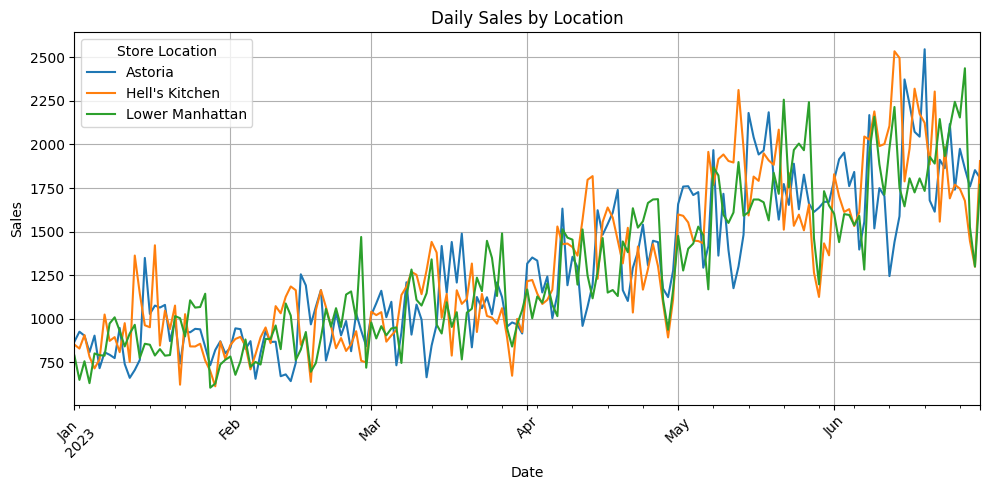

In [44]:
daily_sales_by_location.plot(figsize=(10, 5), title = 'Daily Sales by Location')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Store Location')
plt.show()

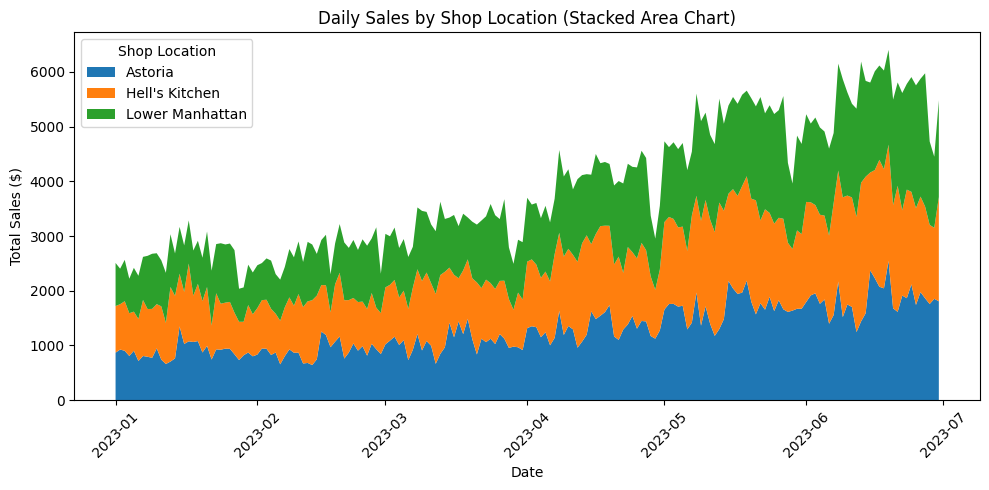

In [47]:
plt.figure(figsize=(10, 5))

plt.stackplot(daily_sales_by_location.index, daily_sales_by_location.T, labels=daily_sales_by_location.columns)

plt.title('Daily Sales by Shop Location (Stacked Area Chart)')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
# plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Shop Location')
plt.show()